## Feature Extraction

To extract the useful features from the audio data, we will use Librosa library. It provides several methods to extract different features from the sound clips. I'm going to use these features to perform more EDA.

**Chroma:**

Chroma is a octave-independent measure of the strength of all possible notes in the western 12 note scale at different points in time, based on the Short-Time Fourier Transform (STFT).

** MFCC(Mel-frequency cepstral coefficients):**

In sound processing, the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency. Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC. The difference between the cepstrum and the mel-frequency cepstrum is that in the MFC, the frequency bands are equally spaced on the mel scale, which approximates the human auditory system's response more closely than the linearly-spaced frequency bands used in the normal cepstrum. This frequency warping can allow for better representation of sound, for example, in audio compression.

**Melspectrogram:**

An object of type MelSpectrogram represents an acoustic time-frequency representation of a sound: the power spectral density P(f, t).It is sampled into a number of points around equally spaced times ti and frequencies fj (on a Mel frequency scale).

**Spectral Contrast:** 

Spectral contrast is defined as the decibel difference between peaks and valleys in the spectrum.

**Tonnetz:** 

Tonnetz is a planar array of pitches along three simplicial axes, corresponding to the three consonant intervals which gives us the tonal centroid features (tonnetz).

In [1]:
from os import chdir 
chdir('./code')

In [190]:
import glob
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import seaborn as sns
import uuid
from scipy.io import wavfile
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
%matplotlib inline

In [205]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
    return mfccs, chroma, mel, contrast, tonnetz


#### Electronic

In [220]:
ft = extract_feature('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Snippets/electronic_snippets/01 Angel.1.wav')
ft1 = pd.Series(ft)
ft1

0    [-506.813791201, 92.2612723998, 68.9546822727,...
1    [0.879758862891, 0.853033832539, 0.77136816938...
2    [1.01910167794, 130.899919071, 204.556193082, ...
3    [28.4984537886, 17.3871729267, 19.3831577096, ...
4    [0.00474754987017, 0.018676758667, 0.011141859...
dtype: object

In [185]:
metal_1 = librosa.load('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Snippets/electronic_snippets/01 Angel.1.wav', sr=44100)
metal_1

(array([ 0.        ,  0.        ,  0.        , ..., -0.02998352,
        -0.02828979, -0.02650452], dtype=float32), 44100)

In [175]:
metal_1[1]

44100

In [20]:
ary = np.array((1,2,3))

In [51]:
for i in range(int(17685300/441000)):
    print(441000*i)

0
441000
882000
1323000
1764000
2205000
2646000
3087000
3528000
3969000
4410000
4851000
5292000
5733000
6174000
6615000
7056000
7497000
7938000
8379000
8820000
9261000
9702000
10143000
10584000
11025000
11466000
11907000
12348000
12789000
13230000
13671000
14112000
14553000
14994000
15435000
15876000
16317000
16758000
17199000


In [120]:
outfile_location = 'metal/'
song_file = ('metal_snippets' + str(uuid.uuid1()), ary)
song_ary = wavfile.read(song_file + "*.wav") 
rate = 441000
n_snips = int(len(song_ary)/rate)
snip = song_ary[rate * i : rate * (i + 1)]
np.save(outfile_location, ary)

TypeError: can only concatenate tuple (not "str") to tuple

In [63]:
!ls metal/

424b5787-0121-11e7-84ec-685b359e28a5.npy
e614fcf3-0298-11e7-a22c-685b359e28a5.npy


In [46]:
metal_1

(44100, array([[0, 0],
        [0, 0],
        [0, 0],
        ..., 
        [0, 0],
        [0, 0],
        [0, 0]], dtype=int16))

In [23]:
metal_1[1].shape

(17685300, 2)

In [24]:
17685300/44100/60

6.683786848072562

In [25]:
snip_1 = metal_1[1][:441000]

In [26]:
snip_1.shape

(441000, 2)

In [27]:
17685300/441000

40.10272108843537

In [28]:
np.save('metal/'+ str(uuid.uuid1()), ary)

In [29]:
!ls metal

424b5787-0121-11e7-84ec-685b359e28a5.npy
e614fcf3-0298-11e7-a22c-685b359e28a5.npy


In [ ]:
for i in range(int(17685300/441000)):
    print(441000*i)

In [225]:
feature = extract_feature('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Snippets/electronic_snippets/01 Angel.1.wav')
feature

(array([ -5.06813791e+02,   9.22612724e+01,   6.89546823e+01,
          4.64013807e+01,   3.29526182e+01,   2.69508441e+01,
          2.26953461e+01,   1.73822190e+01,   1.24291212e+01,
          9.64058483e+00,   8.85142980e+00,   8.44186095e+00,
          7.41740953e+00,   6.03195748e+00,   5.13750857e+00,
          4.91885438e+00,   4.71810313e+00,   3.77632905e+00,
          2.22612419e+00,   8.84422958e-01,   3.87394111e-01,
          5.24883360e-01,   6.37369986e-01,   2.63539686e-01,
         -5.37117725e-01,  -1.44656503e+00,  -2.18095914e+00,
         -2.67610046e+00,  -2.97473890e+00,  -3.11442759e+00,
         -3.08915721e+00,  -2.98808581e+00,  -2.97891450e+00,
         -3.12911318e+00,  -3.25160467e+00,  -3.13201554e+00,
         -2.83147231e+00,  -2.65509859e+00,  -2.75072783e+00,
         -2.92382549e+00]),
 array([ 0.87975886,  0.85303383,  0.77136817,  0.58232524,  0.39942823,
         0.28148516,  0.28179027,  0.33870035,  0.32706841,  0.36376544,
         0.51108234,

In [187]:
snip_loc = '/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Snippets/electronic_snippets/01 Angel.1.wav'
snip_loc2 = '/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Snippets/electronic_snippets/01 Angel.3.wav'

In [188]:
file2 = librosa.load(snip_loc2)

In [135]:
file = librosa.load(snip_loc)

In [139]:
librosa.stft(file[0]).shape

(1025, 431)

In [189]:
librosa.stft(file2[0]).shape

(1025, 431)

## Feature Comparison

In [125]:
def extract_features(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
    return zip(mfccs,chroma,mel,contrast,tonnetz)

### Electronic

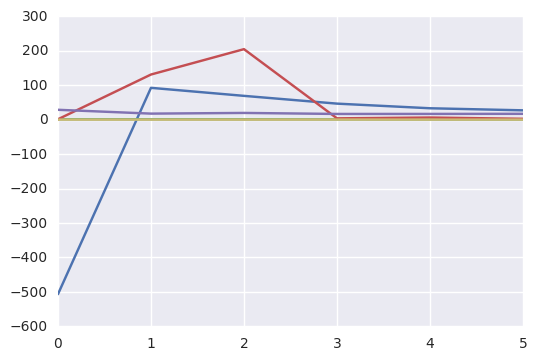

In [197]:
elc_ft = extract_features('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Snippets/electronic_snippets/01 Angel.1.wav')
plt.plot(elc_ft)

### Jazz

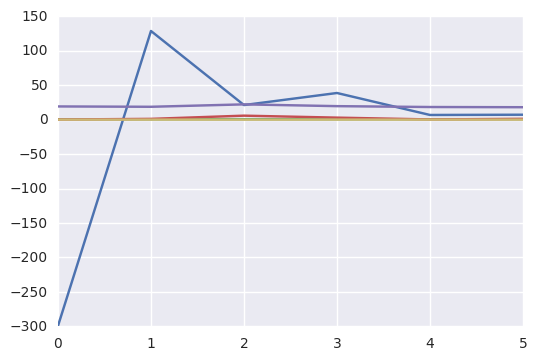

In [192]:
jazz_ft = extract_features('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Snippets/jazz_snippets/Kind Of Blue.19.wav')
plt.plot(jazz_ft)

### Metal

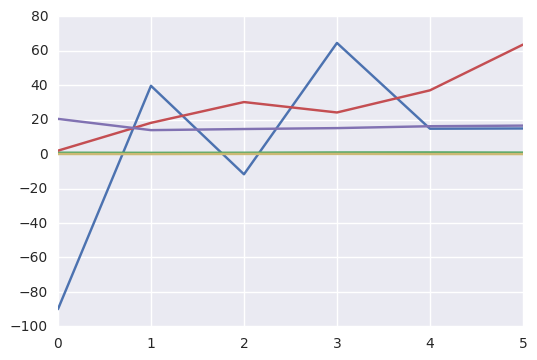

In [193]:
metal_ft = extract_features('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Snippets/metal_snippets/32 Damage, Inc_1.43.wav')
plt.plot(metal_ft)                   

### Oldies

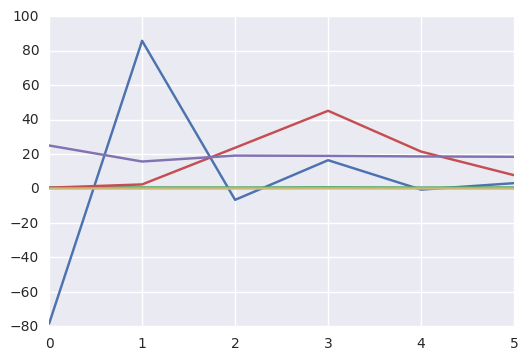

In [194]:
oldies_ft = extract_features('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Snippets/oldies_snippets/04 Little Deuce Coupe.11.wav')
plt.plot(oldies_ft)      

### Reggae

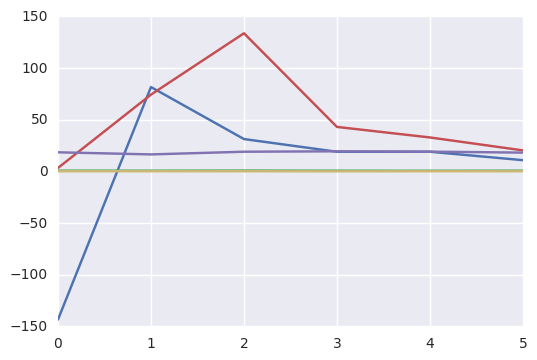

In [195]:
reggae_ft = extract_features('/Users/ginodefalco/dsi/dsi-workspace/projects2/project-captsone/Snippets/reggae_snippets/01 Easy Skanking.19.wav')
plt.plot(reggae_ft)     

In [ ]:
ft = pd.concat()
result = pd.concat(frames, keys=['x', 'y', 'z'])